# Assignment 1 Text Analysis


## Setting up the project

### Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
import



In [ ]:
nltk.download('punkt_tab')


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


### Accessing the data

In [ ]:

file_path = "Australian Skills Classification - December 2023.xlsx"
sheets = ["Occupation descriptions", "Core competency descriptions", "Specialist tasks hierarchy", "Tech tools heirarchy", "Core competencies", "Specialist tasks data", "Technology tools", "Appendix - tech tool examples"]

occupation_df = pd.read_excel(file_path, sheet_name=sheets[0], engine = "openpyxl")
cc_desc_df = pd.read_excel(file_path, sheet_name=sheets[1], engine = "openpyxl")
cc_df = pd.read_excel(file_path, sheet_name=sheets[4], engine = "openpyxl")
st_hier_df = pd.read_excel(file_path, sheet_name=sheets[2], engine = "openpyxl")
st_df = pd.read_excel(file_path, sheet_name=sheets[5], engine = "openpyxl")
tt_hier_df = pd.read_excel(file_path, sheet_name=sheets[3], engine = "openpyxl")
tt_df = pd.read_excel(file_path, sheet_name=sheets[6], engine = "openpyxl")
tt_eg = pd.read_excel(file_path, sheet_name=sheets[7], engine = "openpyxl")


In [ ]:
df_list = [
    ("occupation_df", occupation_df),
    ("cc_desc_df", cc_desc_df),
    ("cc_df", cc_df),
    ("st_hier_df", st_hier_df),
    ("st_df", st_df),
    ("tt_hier_df", tt_hier_df),
    ("tt_df", tt_df),
]

for name, df in df_list:
    print(f"{name} columns: )", df.info())
    print()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB
occupation_df columns: ) None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value              

### Basic Data Pre-processing for NLP project

## Initial Exploratory Data Analysis

### EDA - Occupation List Dataframe

In [ ]:
occupation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Occupation Type     1650 non-null   object
 1   ANZSCO Code         1650 non-null   int64 
 2   Sub-Profile Code    472 non-null    object
 3   ANZSCO Title        1650 non-null   object
 4   ANZSCO Description  1650 non-null   object
dtypes: int64(1), object(4)
memory usage: 64.6+ KB


In [ ]:
print("There are",occupation_df['Occupation Type'].nunique(), "types of Occupations listed in ACS")
print('These occupations are:', occupation_df['Occupation Type'].unique())

There are 5 types of Occupations listed in ACS
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation'
 'NEC Category']


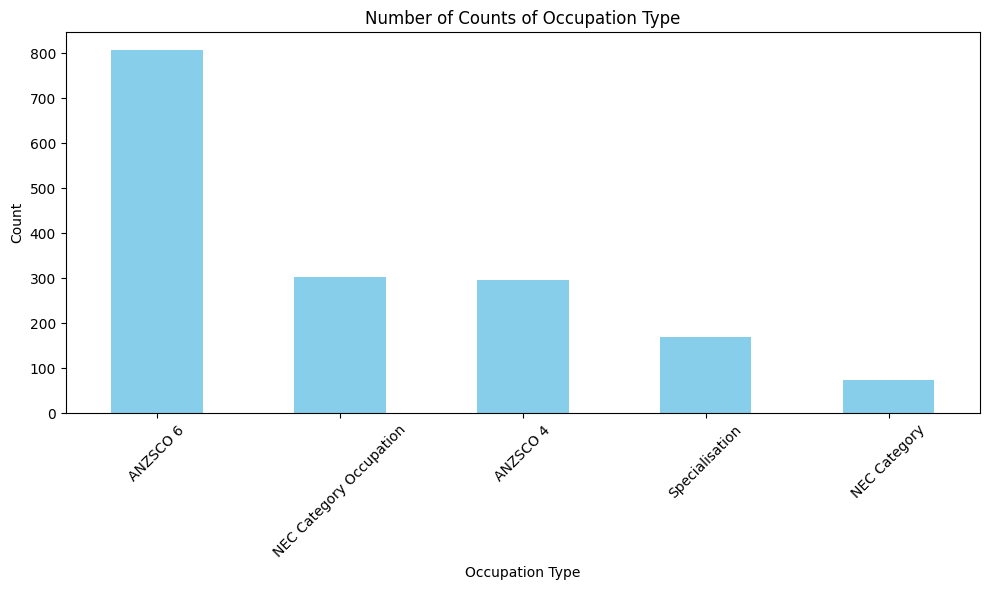

In [ ]:
import matplotlib.pyplot as plt

# Count occurrences of each occupation type
occupation_counts = occupation_df['Occupation Type'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
occupation_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Occupation Type")
plt.ylabel("Count")
plt.title("Number of Counts of Occupation Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
print("There are",occupation_df['ANZSCO Code'].count(), "different occupations listed")

There are 1650 different occupations listed


In [ ]:
# Count occurrences of each ANZSCO Title
duplicate_counts = occupation_df['ANZSCO Title'].value_counts()

# Filter only titles that appear more than once
duplicates = duplicate_counts[duplicate_counts > 1]

# Check if there are any duplicates and print results
if not duplicates.empty:
    print("Duplicated ANZSCO Titles and their counts:\n", duplicates)
else:
    print("There is no job duplication in the dataset.")


There is no job duplication in the dataset.


In [ ]:
# Get unique occupation types where 'Sub-Profile Code' is not NaN
occupation_types_with_subprofile = occupation_df.loc[occupation_df['Sub-Profile Code'].notna(), 'Occupation Type'].unique()

# Display the results
print("Occupation Types with Sub-Profile Code:\n", occupation_types_with_subprofile)


Occupation Types with Sub-Profile Code:
 ['Specialisation' 'NEC Category Occupation']


In [ ]:
# Count occurrences of each ANZSCO Title
duplicate_counts = occupation_df['ANZSCO Description'].value_counts()

# Filter only titles that appear more than once
duplicates = duplicate_counts[duplicate_counts > 1]

# Check if there are any duplicates and print results
if not duplicates.empty:
    print("Duplicated ANZSCO Description and their counts:\n", duplicates)
else:
    print("There is no job description duplication in the dataset.")


# show example that even though there is no duplication but how even a small change (emu example) can cause this

There is no job duplication in the dataset.


### EDA - Core Competency Dataframes
1. Core Competency Description
2. Core Competency Data

In [ ]:
cc_desc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Core Competency              100 non-null    object
 1   Core Competency Description  100 non-null    object
 2   Score                        100 non-null    int64 
 3   Proficiency Level            100 non-null    object
 4   Anchor Value                 100 non-null    object
dtypes: int64(1), object(4)
memory usage: 4.0+ KB


In [ ]:
print(cc_desc_df['Core Competency'].nunique())
print(cc_desc_df['Core Competency'].unique())

10
['Digital engagement' 'Initiative and innovation' 'Learning' 'Numeracy'
 'Oral communication' 'Planning and organising' 'Problem solving'
 'Reading' 'Teamwork' 'Writing']


In [ ]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Occupation Type    11030 non-null  object 
 1   ANZSCO Code        11030 non-null  int64  
 2   Sub-Profile Code   0 non-null      float64
 3   ANZSCO Title       11030 non-null  object 
 4   Core Competency    11030 non-null  object 
 5   Score              11030 non-null  int64  
 6   Proficiency Level  11030 non-null  object 
 7   Anchor Value       11030 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 689.5+ KB


In [ ]:
print("There are",cc_df['Occupation Type'].nunique(), "types of Occupations listed in Core Competency Data")
print('These occupations are:', cc_df['Occupation Type'].unique())
print("There are",cc_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 2 types of Occupations listed in Core Competency Data
These occupations are: ['ANZSCO 6' 'ANZSCO 4']
There are 1101 different occupations listed


In [ ]:
cc_counts = cc_df.groupby("ANZSCO Code")["Core Competency"].nunique().sort_values(ascending=False)


if (cc_counts == 10).all():
    print("✅ All ANZSCO Codes have exactly 10 core competencies.")
else:
    print("❌ Some ANZSCO Codes have more or less than 10 core competencies.")


✅ All ANZSCO Codes have exactly 10 core competencies.


### EDA - Specialist Task Dataframes
1. Specialist Task Hierarchy
2. Specialist Task Data

In [ ]:
st_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1686 entries, 0 to 1685
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Specialist Task     1686 non-null   object
 1   Specialist Cluster  1686 non-null   object
 2   Cluster Family      1686 non-null   object
 3   Skill Statement     1686 non-null   object
dtypes: object(4)
memory usage: 52.8+ KB


In [ ]:
print("The number of Specialist Task in ASC data are:", st_hier_df['Specialist Task'].nunique())
print("The number of Specialist Clusters in ASC data are:", st_hier_df['Specialist Cluster'].nunique())
print("The number of Cluster Families in ASC data are:", st_hier_df['Cluster Family'].nunique())



The number of Specialist Task in ASC data are: 1686
The number of Specialist Clusters in ASC data are: 272
The number of Cluster Families in ASC data are: 31


<ipython-input-39-5ba7527c6a85>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families, palette='viridis')


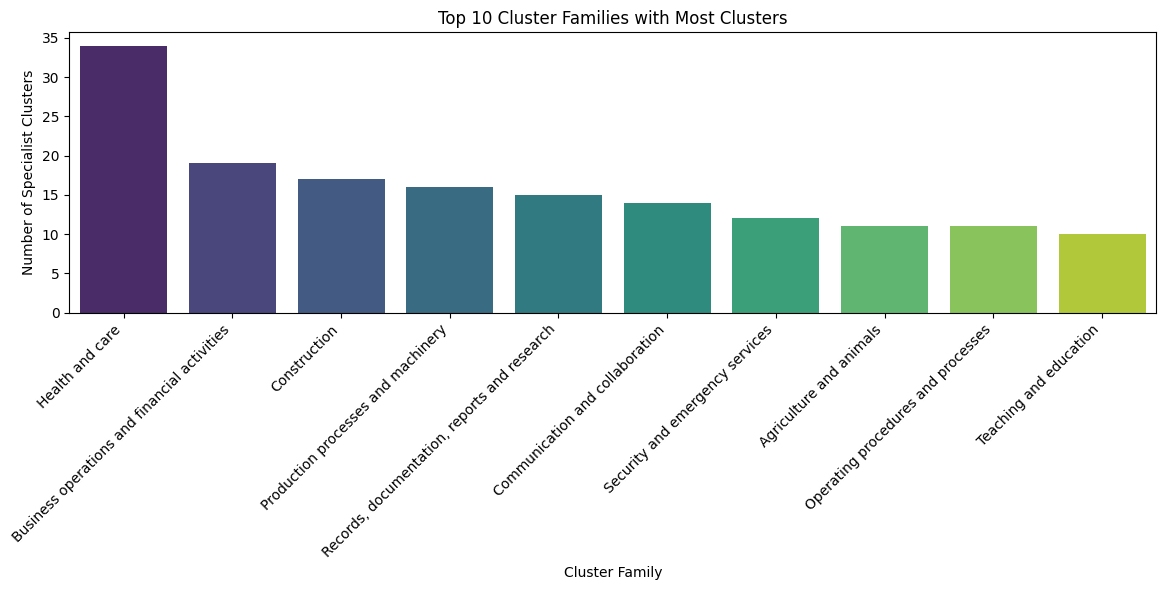

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by Cluster Family and count the number of Specialist Clusters
cluster_family_counts = st_hier_df.groupby('Cluster Family')['Specialist Cluster'].nunique().reset_index()

# Step 2: Sort by the number of clusters in descending order
cluster_family_counts = cluster_family_counts.sort_values(by='Specialist Cluster', ascending=False)

# Step 3: Select the top 10 cluster families with the most clusters
top_10_cluster_families = cluster_family_counts.head(10)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cluster Families with Most Clusters')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Specialist Clusters')
plt.tight_layout()
plt.show()


In [ ]:
st_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30450 entries, 0 to 30449
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type              30450 non-null  object 
 1   ANZSCO Code                  30450 non-null  int64  
 2   Sub-Profile Code             6516 non-null   object 
 3   ANZSCO Title                 30450 non-null  object 
 4   Specialist Task              30450 non-null  object 
 5   % of time spent on task      23934 non-null  float64
 6   Emerging/
Trending Flag      1402 non-null   object 
 7   Specialist Cluster           30450 non-null  object 
 8    % of time spent on cluster  23934 non-null  float64
 9   Cluster Family               30450 non-null  object 
 10  % of time spent on family    23934 non-null  float64
 11  Skills Statement             30450 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 2.8+ MB


In [ ]:
print("There are",st_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', st_df['Occupation Type'].unique())
print("There are",st_df['ANZSCO Code'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'Specialisation' 'NEC Category Occupation']
There are 1177 different occupations listed


<ipython-input-51-0dee8559d0aa>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families_filtered, palette='viridis')


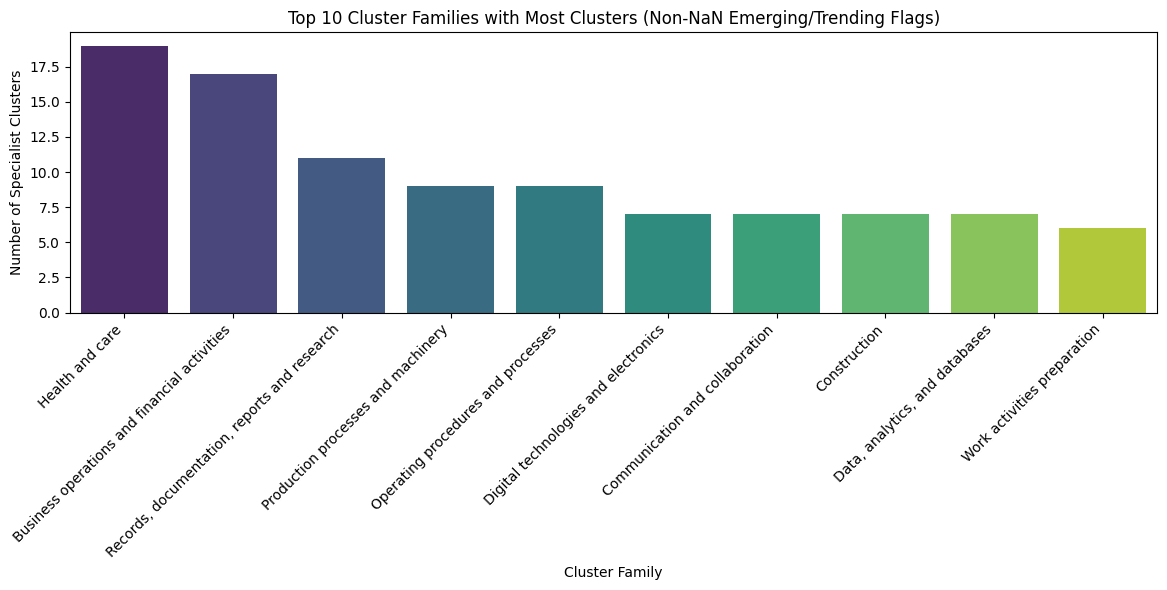

In [ ]:
# Step 1: Filter the data where Emerging/Trending Flags is not NaN
filtered_df = st_df[st_df['Emerging/\nTrending Flag'].notna()]

# Step 2: Group by Cluster Family and count the number of Specialist Clusters
cluster_family_counts_filtered = filtered_df.groupby('Cluster Family')['Specialist Cluster'].nunique().reset_index()

# Step 3: Sort by the number of clusters in descending order
cluster_family_counts_filtered = cluster_family_counts_filtered.sort_values(by='Specialist Cluster', ascending=False)

# Step 4: Select the top 10 cluster families with the most clusters
top_10_cluster_families_filtered = cluster_family_counts_filtered.head(10)

# Step 5: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Cluster Family', y='Specialist Cluster', data=top_10_cluster_families_filtered, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Cluster Families with Most Clusters (Non-NaN Emerging/Trending Flags)')
plt.xlabel('Cluster Family')
plt.ylabel('Number of Specialist Clusters')
plt.tight_layout()
plt.show()


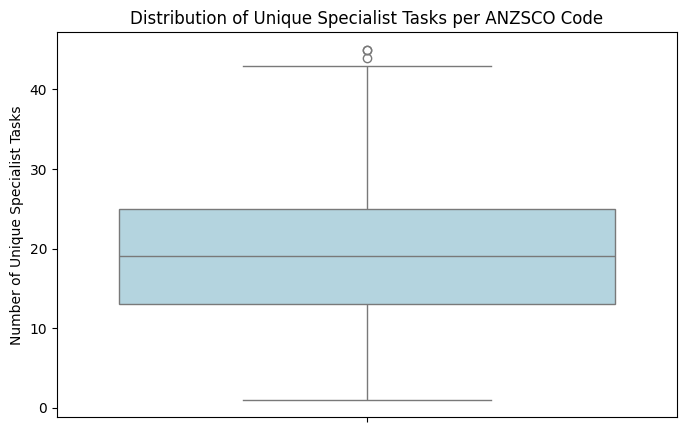

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=st_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Specialist Tasks")
plt.title("Distribution of Unique Specialist Tasks per ANZSCO Code")

# Show plot
plt.show()


In [ ]:
# Count unique specialist tasks for each ANZSCO Code
st_counts = st_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Specialist Task"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = st_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262113                              Systems Administrator   
1       313113                                  Web Administrator   
2       249212                    Dance Teacher (Private Tuition)   
3         2412                            Primary School Teachers   
4       241213                             Primary School Teacher   
5       263111              Computer Network and Systems Engineer   
6       322313                               Welder (First Class)   
7         2413  Middle School Teachers / Intermediate School T...   
8       241311  Middle School Teacher / Intermediate School Te...   
9       262111                             Database Administrator   

   Specialist Task  
0               45  
1               45  
2               44  
3               43  
4               43  
5               41  
6               41  
7               40  
8               40  
9               40  


### EDA - Technology Tools Dataframes
1. Technology Tools Hierarchy
2. Technology Tools Data

In [ ]:
tt_hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Technology Tool Category              94 non-null     object
 1   Technology Tool Category Description  94 non-null     object
 2   Technology Tool                       94 non-null     object
 3   Technology Tool Description           94 non-null     object
 4   Technology Tool Extended Description  94 non-null     object
dtypes: object(5)
memory usage: 3.8+ KB


In [ ]:
print("The number of Tech Tool Category in ASC data are:", tt_hier_df['Technology Tool Category'].nunique())
print("The number of Tech Tool in ASC data are:", tt_hier_df['Technology Tool'].nunique())




The number of Tech Tool Category in ASC data are: 27
The number of Tech Tool in ASC data are: 94


<ipython-input-58-38c09ba31622>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool Category', y='Technology Tool', data=top_5_categories, palette='viridis')


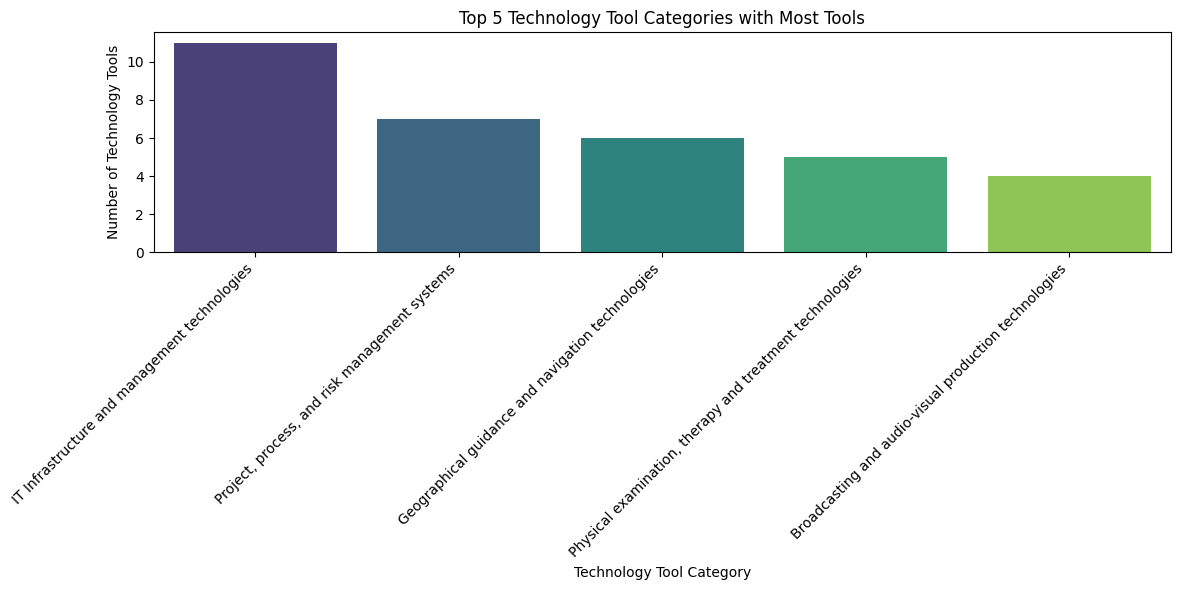

In [ ]:
category_tool_counts = tt_hier_df.groupby('Technology Tool Category')['Technology Tool'].nunique().reset_index()

# Step 2: Sort by the number of tools in descending order
category_tool_counts = category_tool_counts.sort_values(by='Technology Tool', ascending=False)

# Step 3: Select the top 5 categories with the most tools
top_5_categories = category_tool_counts.head(5)

# Step 4: Plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool Category', y='Technology Tool', data=top_5_categories, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Top 5 Technology Tool Categories with Most Tools')
plt.xlabel('Technology Tool Category')
plt.ylabel('Number of Technology Tools')
plt.tight_layout()
plt.show()

In [ ]:
tt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5761 entries, 0 to 5760
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Occupation Type         5761 non-null   object
 1   ANZSCO Code             5761 non-null   int64 
 2   Sub-Profile Code        1300 non-null   object
 3   ANZSCO Title            5761 non-null   object
 4   Technology Tool         5761 non-null   object
 5   Emerging/Trending Flag  441 non-null    object
dtypes: int64(1), object(5)
memory usage: 270.2+ KB


In [ ]:
print("There are",tt_df['Occupation Type'].nunique(), "types of Occupations listed in Specialist Task Data")
print('These occupations are:', tt_df['Occupation Type'].unique())
print("There are",tt_df['ANZSCO Title'].nunique(), "different occupations listed")

There are 4 types of Occupations listed in Specialist Task Data
These occupations are: ['ANZSCO 4' 'ANZSCO 6' 'NEC Category Occupation' 'Specialisation']
There are 1317 different occupations listed


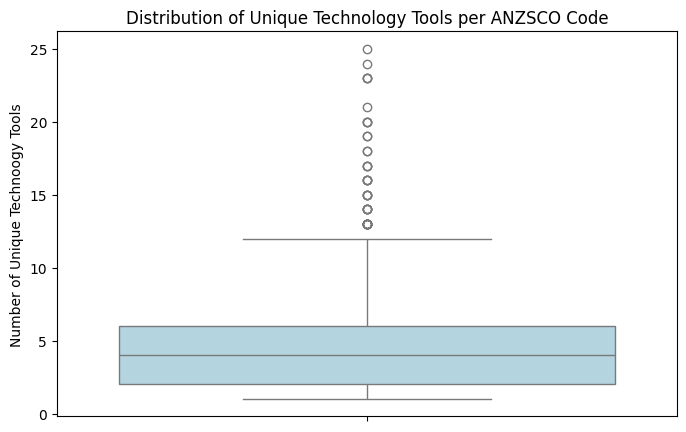

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Plot boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(y=tt_counts, color='lightblue')

# Labels and title
plt.ylabel("Number of Unique Technoogy Tools")
plt.title("Distribution of Unique Technology Tools per ANZSCO Code")

# Show plot
plt.show()


In [ ]:
# Count unique specialist tasks for each ANZSCO Code
tt_counts = tt_df.groupby(["ANZSCO Code", "ANZSCO Title"])["Technology Tool"].nunique()

# Get top 10 ANZSCO Codes with the highest number of specialist tasks
top_10 = tt_counts.nlargest(10).reset_index()

# Display the result
print(top_10)


   ANZSCO Code                                       ANZSCO Title  \
0       262111                             Database Administrator   
1         2611                  ICT Business and Systems Analysts   
2       262113                              Systems Administrator   
3       263111              Computer Network and Systems Engineer   
4       263212                               ICT Support Engineer   
5         2621  Database and Systems Administrators, and ICT S...   
6       135199                                    Network Manager   
7       261111                               ICT Business Analyst   
8       263112                              Network Administrator   
9       261313                                  Software Engineer   

   Technology Tool  
0               25  
1               24  
2               23  
3               23  
4               23  
5               21  
6               20  
7               20  
8               20  
9               19  


In [ ]:
tt_eg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Technology Tool          712 non-null    object
 1   Technology Tool Example  712 non-null    object
dtypes: object(2)
memory usage: 11.3+ KB


Number of Technology Tool Examples for each Technology Tool:
                                      Technology Tool  Technology Tool Example
0         Accounting and financial management systems                        5
1          Air, space, or watercraft guidance systems                        5
2     Alternative and complementary therapy equipment                       12
3               Application and load testing software                        8
4                         Application server software                        5
..                                                ...                      ...
89                       Virtual reality technologies                        5
90  Virtualised IT environments and terminal services                        5
91            Voice recognition and response software                        3
92                                   Wearable devices                       11
93             Web page creation and editing software                 

<ipython-input-67-03d4010d077f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool', y='Technology Tool Example', data=tool_example_counts, palette='viridis')


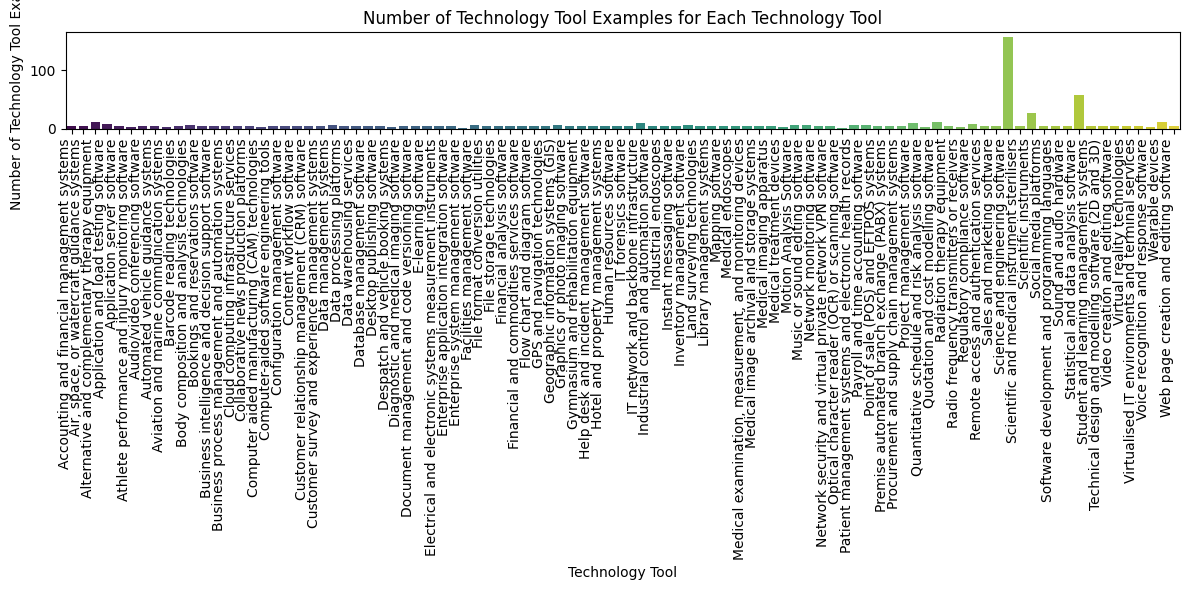

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Technology Tool' and count the number of 'Technology Tool Example'
tool_example_counts = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

# Step 2: Display the table
print("Number of Technology Tool Examples for each Technology Tool:")
print(tool_example_counts)

# Step 3: Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool', y='Technology Tool Example', data=tool_example_counts, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Number of Technology Tool Examples for Each Technology Tool')
plt.xlabel('Technology Tool')
plt.ylabel('Number of Technology Tool Examples')
plt.tight_layout()
plt.show()


Top 10 Technology Tools with the Most Technology Tool Examples:
                                    Technology Tool  Technology Tool Example
79                 Science and engineering software                      157
85           Statistical and data analysis software                       58
81                           Scientific instruments                       27
2   Alternative and complementary therapy equipment                       12
92                                 Wearable devices                       11
73            Quotation and cost modelling software                       11
71                      Project management software                       10
48           IT network and backbone infrastructure                        9
3             Application and load testing software                        8
76                   Regulatory compliance software                        8


<ipython-input-68-ed63de03c6fc>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Technology Tool', y='Technology Tool Example', data=top_10_tool_example_counts, palette='viridis')


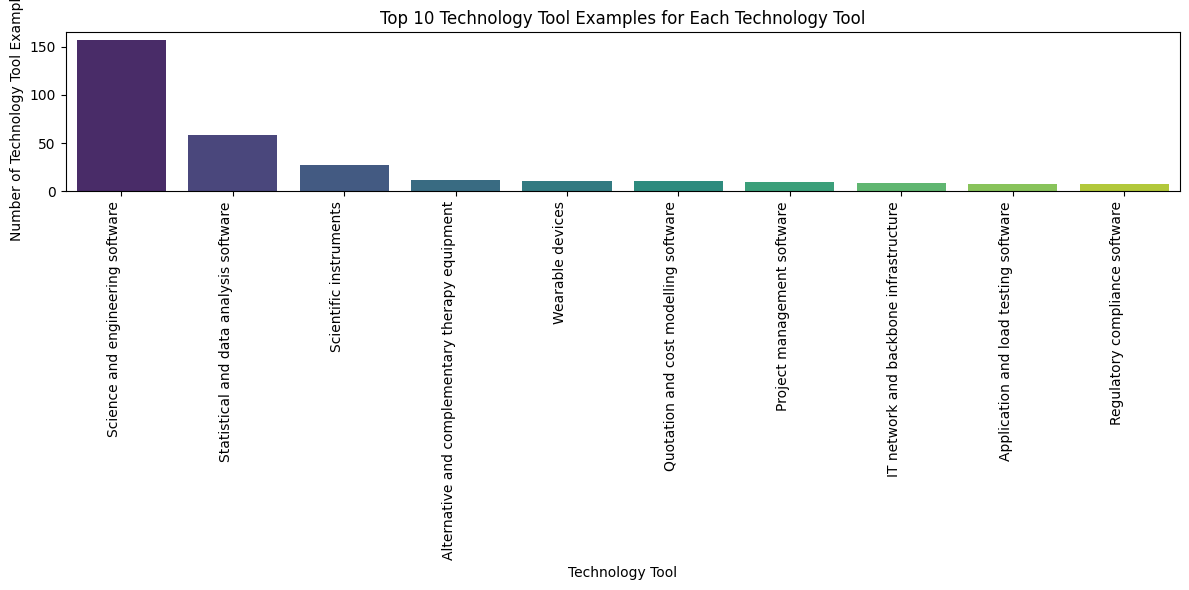

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Technology Tool' and count the number of 'Technology Tool Example'
tool_example_counts = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

# Step 2: Sort by the number of Technology Tool Examples in descending order and get the top 10
top_10_tool_example_counts = tool_example_counts.sort_values(by='Technology Tool Example', ascending=False).head(10)

# Step 3: Display the table for top 10
print("Top 10 Technology Tools with the Most Technology Tool Examples:")
print(top_10_tool_example_counts)

# Step 4: Visualize the data
plt.figure(figsize=(12, 6))
sns.barplot(x='Technology Tool', y='Technology Tool Example', data=top_10_tool_example_counts, palette='viridis')
plt.xticks(rotation=90, ha='right')
plt.title('Top 10 Technology Tool Examples for Each Technology Tool')
plt.xlabel('Technology Tool')
plt.ylabel('Number of Technology Tool Examples')
plt.tight_layout()
plt.show()


In [ ]:
# Step 1: Group by 'Technology Tool' and count the unique 'Technology Tool Example'
tt_eg_count_df = tt_eg.groupby('Technology Tool')['Technology Tool Example'].nunique().reset_index()

# Step 2: Rename the columns for clarity (optional)
tt_eg_count_df.columns = ['Technology Tool', 'Technology Tool Example Count']

# Display the new DataFrame
print(tt_eg_count_df.head())  # Show the first few rows of the new DataFrame


                                   Technology Tool  \
0      Accounting and financial management systems   
1       Air, space, or watercraft guidance systems   
2  Alternative and complementary therapy equipment   
3            Application and load testing software   
4                      Application server software   

   Technology Tool Example Count  
0                              5  
1                              5  
2                             12  
3                              8  
4                              5  


## Merging Relevent Dataframes
1. This helps segmentise the project into 3 different approaches to answer multiple ASC related question

In [ ]:
def merge_all_dataframes(df1, df2, df3, col_1, col_2):
    merged_df = df3.merge(df1, on=col_1, how="left")
    merged_df = merged_df.merge(df2, on=col_2, how="left")
    print("\nFinal Merged Dataset Sample:")
    print(merged_df.head())
    return merged_df



tt_merged_df = merge_all_dataframes(tt_df, occupation_df, tt_hier_df, "Technology Tool", "ANZSCO Code")
st_merged_df = merge_all_dataframes(st_hier_df, occupation_df, st_df, "Specialist Task", "ANZSCO Code")




Final Merged Dataset Sample:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                   

In [ ]:
# Step 1: Merge the DataFrames on 'Technology Tool'
tt_merged_df = pd.merge(tt_merged_df, tt_eg_count_df, on='Technology Tool', how='left')

# Step 2: Display the merged DataFrame
print("Merged DataFrame:")
print(tt_merged_df.head())  # Display the first few rows of the merged DataFrame


Merged DataFrame:
                            Technology Tool Category  \
0  Broadcasting and audio-visual production techn...   
1  Broadcasting and audio-visual production techn...   
2  Broadcasting and audio-visual production techn...   
3  Broadcasting and audio-visual production techn...   
4  Broadcasting and audio-visual production techn...   

                Technology Tool Category Description  \
0  Systems for audio, video, multimedia and news ...   
1  Systems for audio, video, multimedia and news ...   
2  Systems for audio, video, multimedia and news ...   
3  Systems for audio, video, multimedia and news ...   
4  Systems for audio, video, multimedia and news ...   

                           Technology Tool  \
0  Collaborative news production platforms   
1  Collaborative news production platforms   
2  Collaborative news production platforms   
3  Collaborative news production platforms   
4  Collaborative news production platforms   

                         Techno

In [ ]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              12910 non-null  object 
 1   Technology Tool Category Description  12910 non-null  object 
 2   Technology Tool                       12910 non-null  object 
 3   Technology Tool Description           12910 non-null  object 
 4   Technology Tool Extended Description  12910 non-null  object 
 5   Occupation Type_x                     12910 non-null  object 
 6   ANZSCO Code                           12910 non-null  int64  
 7   Sub-Profile Code_x                    7543 non-null   object 
 8   ANZSCO Title_x                        12910 non-null  object 
 9   Emerging/Trending Flag                556 non-null    object 
 10  Occupation Type_y                     12905 non-null  object 
 11  Sub-Profile Cod

In [ ]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [ ]:
def merge_cc_df(df1, df2, df3):
    merged_df = pd.merge(df1, df3, on=["ANZSCO Code", "ANZSCO Title"], how="left")

    print("\nStep 1: Core Competencies merged with Occupation Data")
    print(merged_df.head())
    merged_df = pd.merge(merged_df, df2, on=["Core Competency", "Score"], how="left", suffixes=("", "_desc"))

    print("\nStep 2: Final Merged Dataset with Descriptions")
    print(merged_df.head())

    return merged_df


cc_merged_df = merge_cc_df(cc_df, cc_desc_df, occupation_df)


Step 1: Core Competencies merged with Occupation Data
  Occupation Type_x  ANZSCO Code  Sub-Profile Code_x  \
0          ANZSCO 6       422111                 NaN   
1          ANZSCO 6       422111                 NaN   
2          ANZSCO 6       422111                 NaN   
3          ANZSCO 6       422111                 NaN   
4          ANZSCO 6       422111                 NaN   

                                        ANZSCO Title  \
0  Aboriginal and Torres Strait Islander Educatio...   
1  Aboriginal and Torres Strait Islander Educatio...   
2  Aboriginal and Torres Strait Islander Educatio...   
3  Aboriginal and Torres Strait Islander Educatio...   
4  Aboriginal and Torres Strait Islander Educatio...   

             Core Competency  Score Proficiency Level  \
0         Digital engagement      5      Intermediate   
1  Initiative and innovation      8              High   
2                   Learning      5      Intermediate   
3                   Numeracy      4      In

In [ ]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

### Tech Tools Merged Analysis

In [ ]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              12910 non-null  object 
 1   Technology Tool Category Description  12910 non-null  object 
 2   Technology Tool                       12910 non-null  object 
 3   Technology Tool Description           12910 non-null  object 
 4   Technology Tool Extended Description  12910 non-null  object 
 5   Occupation Type_x                     12910 non-null  object 
 6   ANZSCO Code                           12910 non-null  int64  
 7   Sub-Profile Code_x                    7543 non-null   object 
 8   ANZSCO Title_x                        12910 non-null  object 
 9   Emerging/Trending Flag                556 non-null    object 
 10  Occupation Type_y                     12905 non-null  object 
 11  Sub-Profile Cod

In [ ]:
tt_merged_df.drop(columns=[ "Sub-Profile Code_y", "Occupation Type_y" , "ANZSCO Title_y" ], inplace=True)
tt_merged_df.columns

Index(['Technology Tool Category', 'Technology Tool Category Description',
       'Technology Tool', 'Technology Tool Description',
       'Technology Tool Extended Description', 'Occupation Type_x',
       'ANZSCO Code', 'Sub-Profile Code_x', 'ANZSCO Title_x',
       'Emerging/Trending Flag', 'ANZSCO Description',
       'Technology Tool Example Count'],
      dtype='object')

In [ ]:
tt_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12910 entries, 0 to 12909
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Technology Tool Category              12910 non-null  object 
 1   Technology Tool Category Description  12910 non-null  object 
 2   Technology Tool                       12910 non-null  object 
 3   Technology Tool Description           12910 non-null  object 
 4   Technology Tool Extended Description  12910 non-null  object 
 5   Occupation Type_x                     12910 non-null  object 
 6   ANZSCO Code                           12910 non-null  int64  
 7   Sub-Profile Code_x                    7543 non-null   object 
 8   ANZSCO Title_x                        12910 non-null  object 
 9   Emerging/Trending Flag                556 non-null    object 
 10  ANZSCO Description                    12905 non-null  object 
 11  Technology Tool

In [ ]:
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description,Technology Tool Example Count
0,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 4,2123,NaN,"Film, Television, Radio and Stage Directors",NaN,"Film, Television, Radio and Stage Directors di...",5.0
1,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 4,2124,NaN,Journalists and Other Writers,NaN,Journalists and Other Writers research and com...,5.0
2,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212113,NaN,Radio Presenter,NaN,"Prepares and presents news, sports or other in...",5.0
3,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212312,NaN,"Director (Film, Television, Radio or Stage)",NaN,"Interprets and approves selection of scripts, ...",5.0
4,Broadcasting and audio-visual production techn...,"Systems for audio, video, multimedia and news ...",Collaborative news production platforms,Software used to create and manage news conten...,Collaborative news production platforms encomp...,ANZSCO 6,212315,NaN,Program Director (Television or Radio),NaN,Compiles and directs programs for television o...,5.0


In [ ]:
tt_merged_df.sort_values(by="ANZSCO Code", inplace=True)
tt_merged_df.head()

,Technology Tool Category,Technology Tool Category Description,Technology Tool,Technology Tool Description,Technology Tool Extended Description,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Emerging/Trending Flag,ANZSCO Description,Technology Tool Example Count
10475,"Project, process, and risk management systems","Systems to manage projects, risks, regulatory ...",Project management software,"Software for planning, documenting, and managi...",Project management software incorporates softw...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,10.0
2017,Data analysis and reporting platforms,Software for data analysis and produce electro...,Statistical and data analysis software,Software used to support the process of analys...,Statistical and data analysis software encompa...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,58.0
9153,Payroll and human resource management platforms,Systems to undertake human resource management...,Human resources software,Software and systems used to manage employee a...,Human resources software encompasses software ...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0
447,Communication technologies,"Data, voice and/or video communication platforms",Audio/video conferencing software,Software for collaboration using video or audi...,Audio/video conferencing software enables peop...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0
5152,Graphic design and imagery technologies,Software for graphic design and photographic e...,Flow chart and diagram software,Software used to create 2D and 3D diagrams and...,Flow chart and diagram software incorporates s...,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,NaN,Chief Executives and Managing Directors determ...,5.0


### Specialised Task Merged Analysis

In [ ]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/
Trending Flag      1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  Specialist Cluster_y         67772 non-null  object 
 13  Cluster Family_y

In [ ]:
st_merged_df = st_merged_df.rename(columns={'Emerging/\nTrending Flag': 'Emerging/Trending Flag'})
st_merged_df.drop(columns=[ "Sub-Profile Code_y", "Specialist Cluster_y", "Cluster Family_y" , "ANZSCO Title_y", "Occupation Type_y", "Skill Statement" ], inplace=True)
st_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title_x', 'Specialist Task', '% of time spent on task',
       'Emerging/Trending Flag', 'Specialist Cluster_x',
       ' % of time spent on cluster', 'Cluster Family_x',
       '% of time spent on family', 'Skills Statement', 'ANZSCO Description'],
      dtype='object')

In [ ]:
st_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67772 entries, 0 to 67771
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            67772 non-null  object 
 1   ANZSCO Code                  67772 non-null  int64  
 2   Sub-Profile Code_x           39773 non-null  object 
 3   ANZSCO Title_x               67772 non-null  object 
 4   Specialist Task              67772 non-null  object 
 5   % of time spent on task      27999 non-null  float64
 6   Emerging/Trending Flag       1700 non-null   object 
 7   Specialist Cluster_x         67772 non-null  object 
 8    % of time spent on cluster  27999 non-null  float64
 9   Cluster Family_x             67772 non-null  object 
 10  % of time spent on family    27999 non-null  float64
 11  Skills Statement             67772 non-null  object 
 12  ANZSCO Description           67772 non-null  object 
dtypes: float64(3), i

In [ ]:
st_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title_x,Specialist Task,% of time spent on task,Emerging/Trending Flag,Specialist Cluster_x,% of time spent on cluster,Cluster Family_x,% of time spent on family,Skills Statement,ANZSCO Description
0,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Direct or manage financial activities or opera...,0.1302,NaN,"Manage, monitor and undertake financial activi...",0.1644,Business operations and financial activities,0.5322,Direct and oversee the financial operations of...,Chief Executives and Managing Directors determ...
1,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Direct department or organisational activities,0.1117,Trending,"Manage services, staff or activities",0.2128,Business operations and financial activities,0.5322,Direct and oversee the activities of a work un...,Chief Executives and Managing Directors determ...
2,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,"Direct sales, marketing or customer service ac...",0.0808,NaN,"Manage services, staff or activities",0.2128,Business operations and financial activities,0.5322,"Direct and oversee the sales, marketing, or cu...",Chief Executives and Managing Directors determ...
3,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,"Communicate with others to arrange, coordinate...",0.0665,NaN,Communicate or collaborate with others,0.0750,Communication and collaboration,0.0890,"Coordinate with others in order to plan, organ...",Chief Executives and Managing Directors determ...
4,ANZSCO 4,1111,NaN,Chief Executives and Managing Directors,Analyse data to assess operational or project ...,0.0651,NaN,Use data to inform operational decisions,0.1009,"Data, analytics, and databases",0.1370,Analyse qualitative and quantitative data aris...,Chief Executives and Managing Directors determ...


### Core Competencies Merged Analysis

In [ ]:
cc_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   Occupation Type_y            11030 non-null  object 
 9   Sub-Profile Code_y           0 non-null      object 
 10  ANZSCO Description           11030 non-null  object 
 11  Core Competency Description  11030 non-null  object 
 12  Proficiency Level_desc       11030 non-null  object 
 13  Anchor Value_des

In [ ]:
cc_merged_df.drop(columns=[ "Sub-Profile Code_y" , "Occupation Type_y"], inplace=True)
cc_merged_df.columns

KeyError: "['Sub-Profile Code_y', 'Occupation Type_y'] not found in axis"

In [ ]:
cc_merged_df.drop(columns=[ "Anchor Value_desc" , "Proficiency Level_desc"], inplace=True)
cc_merged_df.columns

Index(['Occupation Type_x', 'ANZSCO Code', 'Sub-Profile Code_x',
       'ANZSCO Title', 'Core Competency', 'Score', 'Proficiency Level',
       'Anchor Value', 'ANZSCO Description', 'Core Competency Description'],
      dtype='object')

In [ ]:
cc_merged_df.head()

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,Build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...,Identifying and using technology (including ha...
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,Negotiate a price and sales terms then prepare...,Assists Aboriginal and Torres Strait Islander ...,"Taking on responsibilities and challenges, bei..."
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,Learn a new filing system that groups document...,Assists Aboriginal and Torres Strait Islander ...,Understanding the implications of new informat...
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,Use a blood pressure machine and accurately re...,Assists Aboriginal and Torres Strait Islander ...,Using mathematics to solve problems and interp...
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,Participate in a work meeting and ask appropri...,Assists Aboriginal and Torres Strait Islander ...,The ability to communicate information and ide...


## NLP Pipeline

### Core Comp

In [ ]:
cc_merged_nlp = cc_merged_df.copy()

In [ ]:
cc_merged_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11030 entries, 0 to 11029
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Occupation Type_x            11030 non-null  object 
 1   ANZSCO Code                  11030 non-null  int64  
 2   Sub-Profile Code_x           0 non-null      float64
 3   ANZSCO Title                 11030 non-null  object 
 4   Core Competency              11030 non-null  object 
 5   Score                        11030 non-null  int64  
 6   Proficiency Level            11030 non-null  object 
 7   Anchor Value                 11030 non-null  object 
 8   ANZSCO Description           11030 non-null  object 
 9   Core Competency Description  11030 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 861.8+ KB


In [ ]:
cc_merged_nlp.head(5)

,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,Build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...,Identifying and using technology (including ha...
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,Negotiate a price and sales terms then prepare...,Assists Aboriginal and Torres Strait Islander ...,"Taking on responsibilities and challenges, bei..."
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,Learn a new filing system that groups document...,Assists Aboriginal and Torres Strait Islander ...,Understanding the implications of new informat...
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,Use a blood pressure machine and accurately re...,Assists Aboriginal and Torres Strait Islander ...,Using mathematics to solve problems and interp...
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,Participate in a work meeting and ask appropri...,Assists Aboriginal and Torres Strait Islander ...,The ability to communicate information and ide...


In [ ]:
# Step 1: Group by 'ANZSCO Title' and count the occurrences
anzsco_title_counts = cc_merged_nlp['ANZSCO Title'].value_counts().reset_index()

# Step 2: Rename columns for clarity
anzsco_title_counts.columns = ['ANZSCO Title', 'Count']

# Step 3: Filter for titles that appear more than 10 times
titles_more_than_10 = anzsco_title_counts[anzsco_title_counts['Count'] > 10]

# Step 4: Display the result
print("ANZSCO Titles that appear more than 10 times:")
print(titles_more_than_10)


ANZSCO Titles that appear more than 10 times:
   ANZSCO Title  Count
0     Zoologist     20
1  Youth Worker     20


In [ ]:
# Step 1: Identify the ANZSCO Titles that appear more than 10 times
anzsco_title_counts = cc_merged_nlp['ANZSCO Title'].value_counts().reset_index()
anzsco_title_counts.columns = ['ANZSCO Title', 'Count']

titles_more_than_10 = anzsco_title_counts[anzsco_title_counts['Count'] > 10]['ANZSCO Title']

# Step 2: Drop the last 10 occurrences for each ANZSCO Title that appears more than 10 times
for title in titles_more_than_10:
    # Filter the rows for each ANZSCO Title
    title_df = cc_merged_nlp[cc_merged_nlp['ANZSCO Title'] == title]

    # Drop the last 10 rows for that title
    filtered_title_df = title_df.iloc[:-10]

    # Remove the current rows for that title and add the filtered rows back
    cc_merged_nlp = pd.concat([cc_merged_nlp[cc_merged_nlp['ANZSCO Title'] != title], filtered_title_df])




In [ ]:
# Step 1: Group by 'ANZSCO Title' and count the occurrences
anzsco_title_counts = cc_merged_nlp['ANZSCO Title'].value_counts().reset_index()

# Step 2: Rename columns for clarity
anzsco_title_counts.columns = ['ANZSCO Title', 'Count']

# Step 3: Filter for titles that appear more than 10 times
titles_more_than_10 = anzsco_title_counts[anzsco_title_counts['Count'] > 10]

# Step 4: Display the result
print("ANZSCO Titles that appear more than 10 times:")
print(titles_more_than_10)


ANZSCO Titles that appear more than 10 times:
Empty DataFrame
Columns: [ANZSCO Title, Count]
Index: []


In [ ]:
# Step 1: Group by 'ANZSCO Title' and calculate the sum of 'score'
top_jobs_scores = cc_merged_nlp.groupby('ANZSCO Title')['Score'].mean().reset_index()

# Step 2: Sort by the sum of scores in descending order and get the top 10
top_10_jobs_scores = top_jobs_scores.sort_values(by='Score', ascending=False).head(10)

# Step 3: Display the result
print("Top 10 ANZSCO Titles with Highest Sum of Scores:")
print(top_10_jobs_scores)


Top 10 ANZSCO Titles with Highest Sum of Scores:
                            ANZSCO Title  Score
745                            Physicist    8.2
651                         Neurosurgeon    7.8
585                        Mathematician    7.8
706                   Paediatric Surgeon    7.8
754   Plastic and Reconstructive Surgeon    7.7
977                             Surgeons    7.7
701                Otorhinolaryngologist    7.7
1045                           Urologist    7.7
768          Policy and Planning Manager    7.6
92                   Biomedical Engineer    7.6


<ipython-input-248-4e9fa5b03362>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='ANZSCO Title', data=top_10_jobs_scores, palette='viridis', ax=axes[0])
<ipython-input-248-4e9fa5b03362>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='ANZSCO Title', data=bottom_5_jobs_scores, palette='viridis', ax=axes[1])


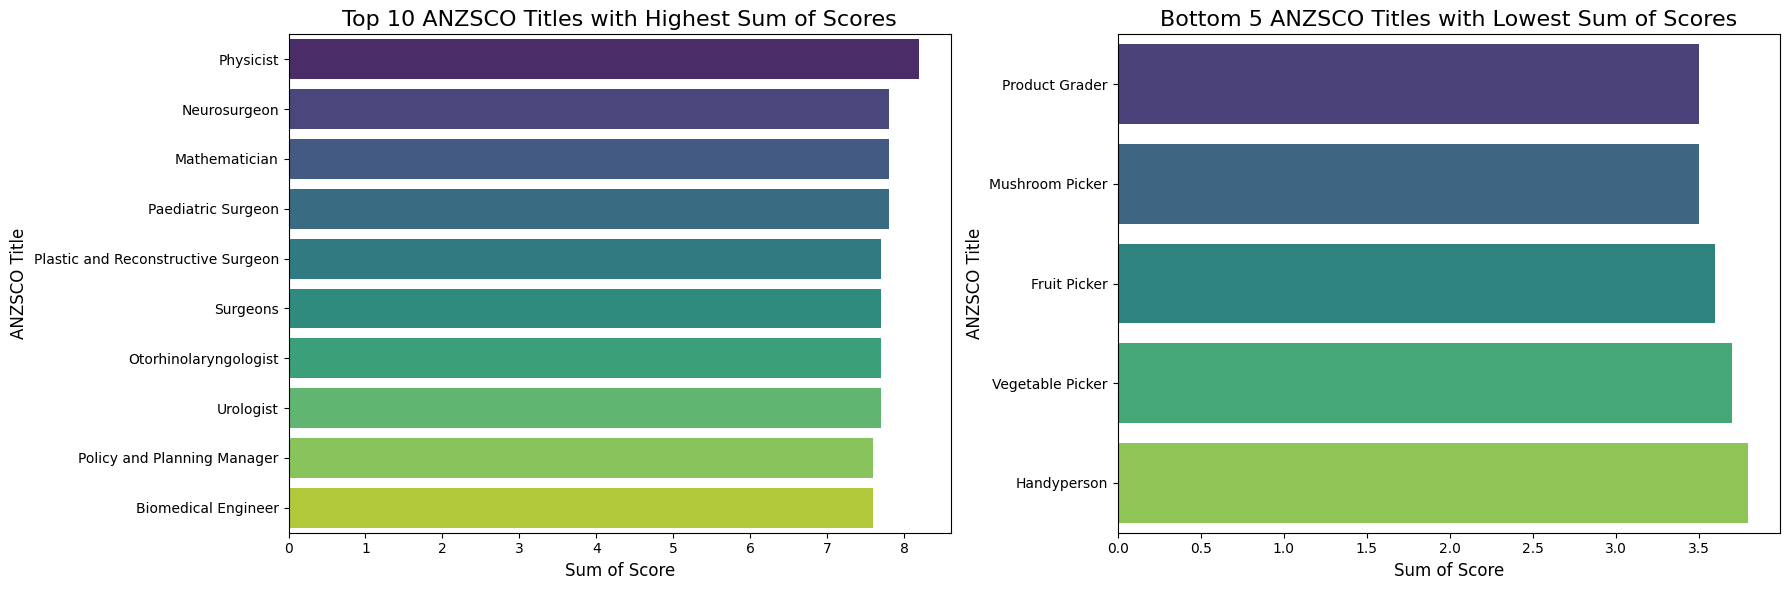

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group by 'ANZSCO Title' and calculate the sum of 'Score'
top_jobs_scores = cc_merged_nlp.groupby('ANZSCO Title')['Score'].mean().reset_index()

# Step 2: Sort by the sum of scores in descending order and get the top 10
top_10_jobs_scores = top_jobs_scores.sort_values(by='Score', ascending=False).head(10)

# Step 3: Sort by the sum of scores in ascending order and get the bottom 5
bottom_5_jobs_scores = top_jobs_scores.sort_values(by='Score', ascending=True).head(5)

# Step 4: Create a combined figure for both plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for top 10 ANZSCO Titles with highest sum of scores
sns.barplot(x='Score', y='ANZSCO Title', data=top_10_jobs_scores, palette='viridis', ax=axes[0])
axes[0].set_title('Top 10 ANZSCO Titles with Highest Sum of Scores', fontsize=16)
axes[0].set_xlabel('Sum of Score', fontsize=12)
axes[0].set_ylabel('ANZSCO Title', fontsize=12)

# Plot for bottom 5 ANZSCO Titles with lowest sum of scores
sns.barplot(x='Score', y='ANZSCO Title', data=bottom_5_jobs_scores, palette='viridis', ax=axes[1])
axes[1].set_title('Bottom 5 ANZSCO Titles with Lowest Sum of Scores', fontsize=16)
axes[1].set_xlabel('Sum of Score', fontsize=12)
axes[1].set_ylabel('ANZSCO Title', fontsize=12)

# Step 5: Adjust layout
plt.tight_layout()

# Step 6: Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk
import re

# Download NLTK stopwords and punkt
nltk.download('stopwords')
nltk.download('punkt')

# Example text from 'Technology Tool Extended Description'


# Step 1: Pre-process the text before tokenization
def clean_text(text):
    # Remove extra spaces, symbols, and digits
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation and symbols
    text = re.sub(r'\d+', '', text)  # Remove digits
    text = text.lower().strip()  # Convert to lowercase and remove leading/trailing whitespaces
    return text

# Apply the text cleaning function
cc_merged_nlp['Anchor Value'] = cc_merged_nlp['Anchor Value'].apply(clean_text)

# Check the changes in the DataFrame
cc_merged_nlp.head()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...,Identifying and using technology (including ha...
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,negotiate a price and sales terms then prepare...,Assists Aboriginal and Torres Strait Islander ...,"Taking on responsibilities and challenges, bei..."
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,learn a new filing system that groups document...,Assists Aboriginal and Torres Strait Islander ...,Understanding the implications of new informat...
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,use a blood pressure machine and accurately re...,Assists Aboriginal and Torres Strait Islander ...,Using mathematics to solve problems and interp...
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,participate in a work meeting and ask appropri...,Assists Aboriginal and Torres Strait Islander ...,The ability to communicate information and ide...


In [ ]:
from nltk.tokenize import word_tokenize
import nltk

# Ensure that the necessary NLTK data is downloaded
nltk.download('punkt')

# Step 1: Tokenize the text in the 'Anchor Value' column
cc_merged_nlp['Tokenized Anchor Value'] = cc_merged_nlp['Anchor Value'].apply(word_tokenize)

# Step 2: Check the changes in the DataFrame
cc_merged_nlp.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,Occupation Type_x,ANZSCO Code,Sub-Profile Code_x,ANZSCO Title,Core Competency,Score,Proficiency Level,Anchor Value,ANZSCO Description,Core Competency Description,Tokenized Anchor Value
0,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Digital engagement,5,Intermediate,build and maintain an effective online profile...,Assists Aboriginal and Torres Strait Islander ...,Identifying and using technology (including ha...,"[build, and, maintain, an, effective, online, ..."
1,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Initiative and innovation,8,High,negotiate a price and sales terms then prepare...,Assists Aboriginal and Torres Strait Islander ...,"Taking on responsibilities and challenges, bei...","[negotiate, a, price, and, sales, terms, then,..."
2,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Learning,5,Intermediate,learn a new filing system that groups document...,Assists Aboriginal and Torres Strait Islander ...,Understanding the implications of new informat...,"[learn, a, new, filing, system, that, groups, ..."
3,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Numeracy,4,Intermediate,use a blood pressure machine and accurately re...,Assists Aboriginal and Torres Strait Islander ...,Using mathematics to solve problems and interp...,"[use, a, blood, pressure, machine, and, accura..."
4,ANZSCO 6,422111,NaN,Aboriginal and Torres Strait Islander Educatio...,Oral communication,7,Intermediate,participate in a work meeting and ask appropri...,Assists Aboriginal and Torres Strait Islander ...,The ability to communicate information and ide...,"[participate, in, a, work, meeting, and, ask, ..."


In [ ]:
tokenized_anchor_values = cc_merged_nlp['Anchor Value'].apply(word_tokenize)

# Now you can access the tokenized values using this variable
print(tokenized_anchor_values.head())

0    [build, and, maintain, an, effective, online, ...
1    [negotiate, a, price, and, sales, terms, then,...
2    [learn, a, new, filing, system, that, groups, ...
3    [use, a, blood, pressure, machine, and, accura...
4    [participate, in, a, work, meeting, and, ask, ...
Name: Anchor Value, dtype: object


In [ ]:
import pandas as pd

# Assuming you have lemmatized tokens in the 'Lemmatized Anchor Value' column
# Flatten the lemmatized tokens into a Series
lemmatized_tokens = cc_merged_nlp['Tokenized Anchor Value'].explode()

# Create a pandas Series to calculate summary statistics
lemmatized_tokens_series = pd.Series(lemmatized_tokens)

# Get summary statistics using describe() for lemmatized tokens
print("Tokenized Tokens Summary:")
print(lemmatized_tokens_series.describe())


Tokenized Tokens Summary:
count     131574
unique       489
top            a
freq       11692
Name: Tokenized Anchor Value, dtype: object


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

# Ensure necessary NLTK data is downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Perform lemmatization on tokenized words
lemmatized_anchor_values = tokenized_anchor_values.apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

# Print sample output
print(lemmatized_anchor_values.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    [build, and, maintain, an, effective, online, ...
1    [negotiate, a, price, and, sale, term, then, p...
2    [learn, a, new, filing, system, that, group, d...
3    [use, a, blood, pressure, machine, and, accura...
4    [participate, in, a, work, meeting, and, ask, ...
Name: Anchor Value, dtype: object


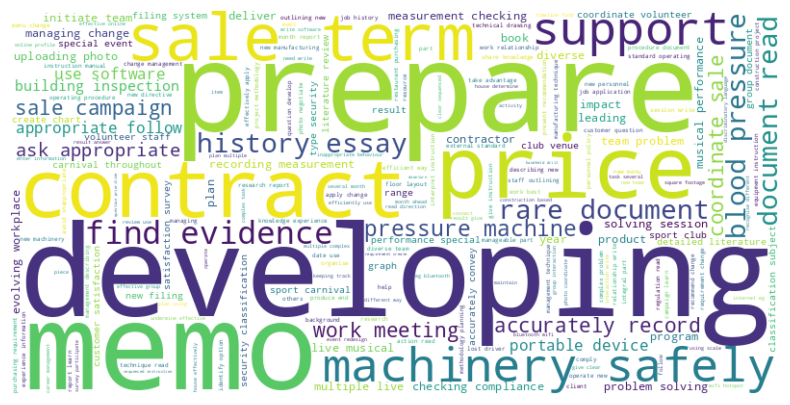

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the list of lemmatized words and join them into a single string
lemmatized_text = ' '.join([' '.join(words) for words in lemmatized_anchor_values])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(lemmatized_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axis
plt.show()


<ipython-input-306-20233d3a8f0e>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


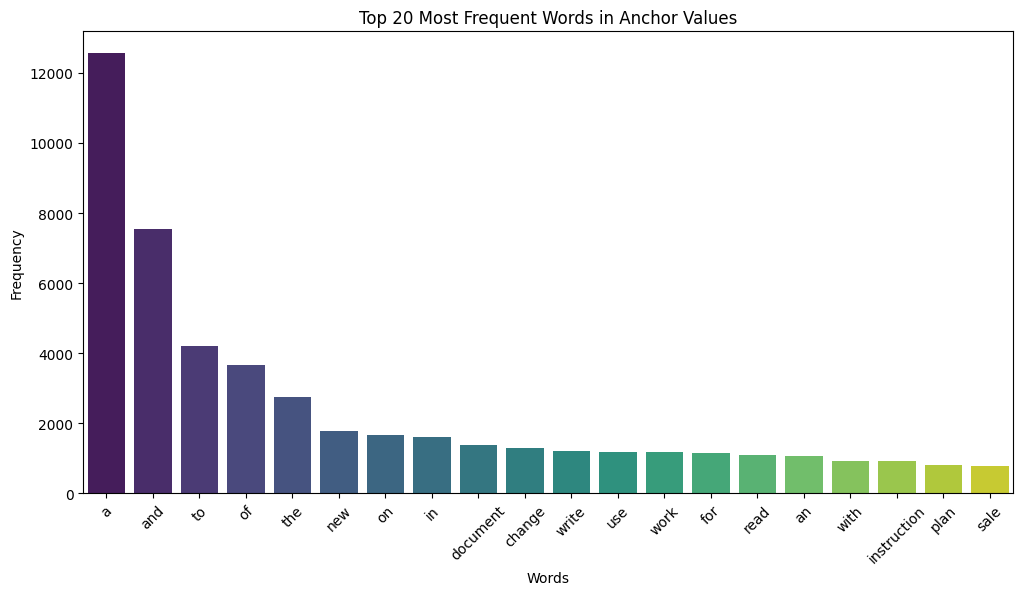

In [ ]:
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Flatten the list of lemmatized words
all_words = [word for words in lemmatized_anchor_values for word in words]

# Count word frequencies
word_freq = Counter(all_words)

# Get the top 20 most common words
top_words = word_freq.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Anchor Values")
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-307-44e9de2d1ef5>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


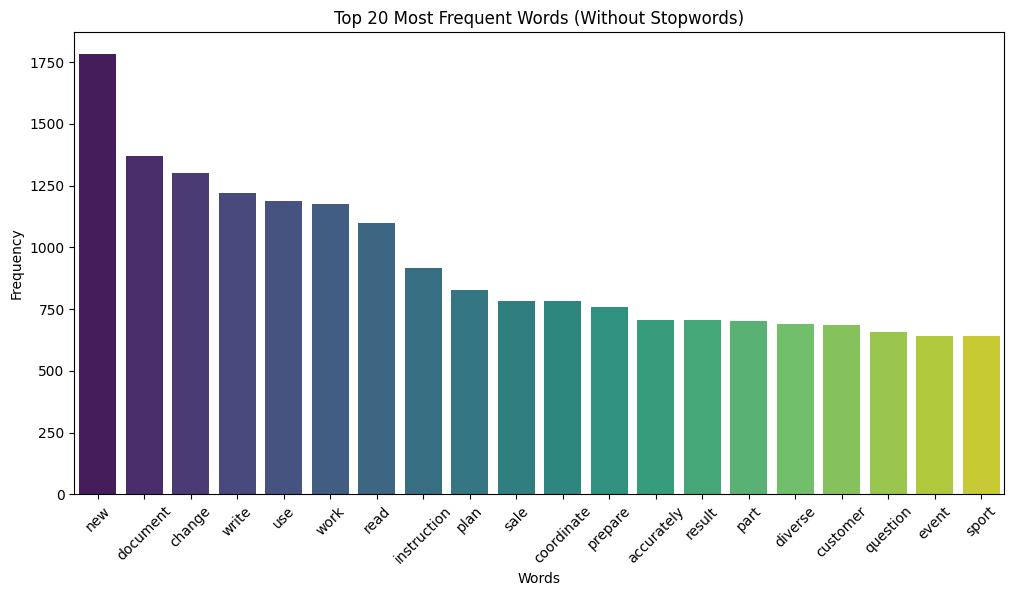

In [ ]:
from nltk.corpus import stopwords
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Ensure stopwords are downloaded
nltk.download('stopwords')

# Get the English stopwords set
stop_words = set(stopwords.words('english'))

# Remove stopwords from the lemmatized words
filtered_words = [[word for word in words if word.lower() not in stop_words] for words in lemmatized_anchor_values]

# Flatten the list after removing stopwords
all_words_filtered = [word for words in filtered_words for word in words]

# Count word frequencies
word_freq_filtered = Counter(all_words_filtered)

# Get the top 20 most common words
top_words_filtered = word_freq_filtered.most_common(20)

# Convert to lists for plotting
words, counts = zip(*top_words_filtered)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(words), y=list(counts), palette="viridis")

# Labels and title
plt.xticks(rotation=45)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words (Without Stopwords)")
plt.show()


In [ ]:
print("Lemmatized data:")
print(f"1. {' '.join(filtered_words[0])}")
print(f"2. {' '.join(filtered_words[1])}")
print(f"3. {' '.join(filtered_words[2])}")

Lemmatized data:
1. build maintain effective online profile career management
2. negotiate price sale term prepare contract house
3. learn new filing system group document type security classification subject date



🔹 Top 20 Bigrams:
negotiate price: 402
price sale: 402
sale term: 402
term prepare: 402
prepare contract: 402
contract house: 402
machinery safely: 396
find evidence: 390
evidence support: 390
support history: 390
history essay: 390
essay rare: 390
rare document: 390
document read: 390
use blood: 388
blood pressure: 388
pressure machine: 388
machine accurately: 388
accurately record: 388
record result: 388

🔹 Top 20 Trigrams:
negotiate price sale: 402
price sale term: 402
sale term prepare: 402
term prepare contract: 402
prepare contract house: 402
find evidence support: 390
evidence support history: 390
support history essay: 390
history essay rare: 390
essay rare document: 390
rare document read: 390
use blood pressure: 388
blood pressure machine: 388
pressure machine accurately: 388
machine accurately record: 388
accurately record result: 388
coordinate sale campaign: 379
participate work meeting: 375
work meeting ask: 375
meeting ask appropriate: 375


<ipython-input-309-b4914f0a317c>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


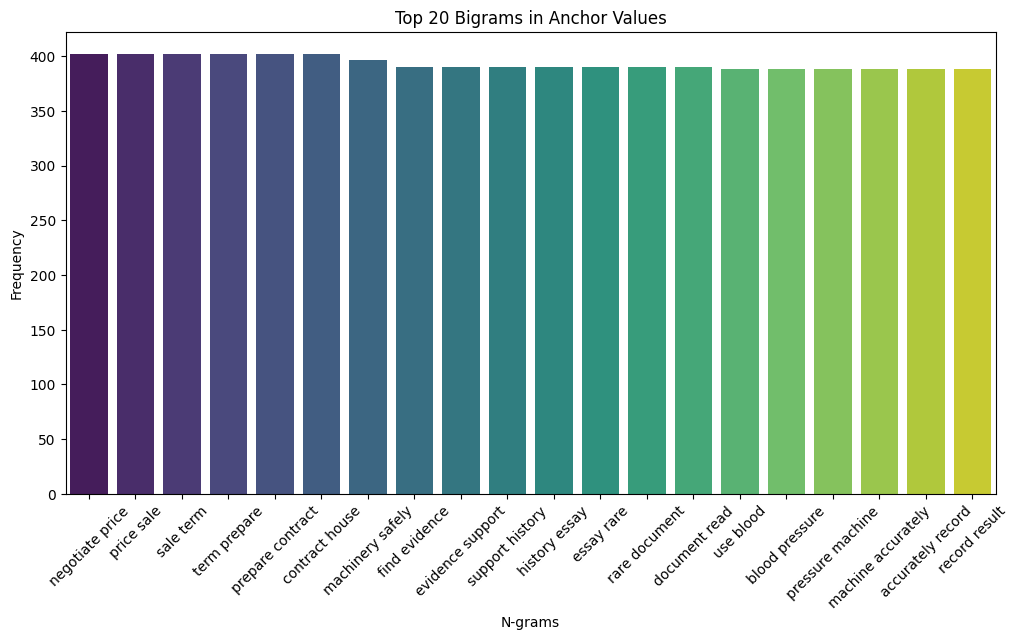

<ipython-input-309-b4914f0a317c>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")


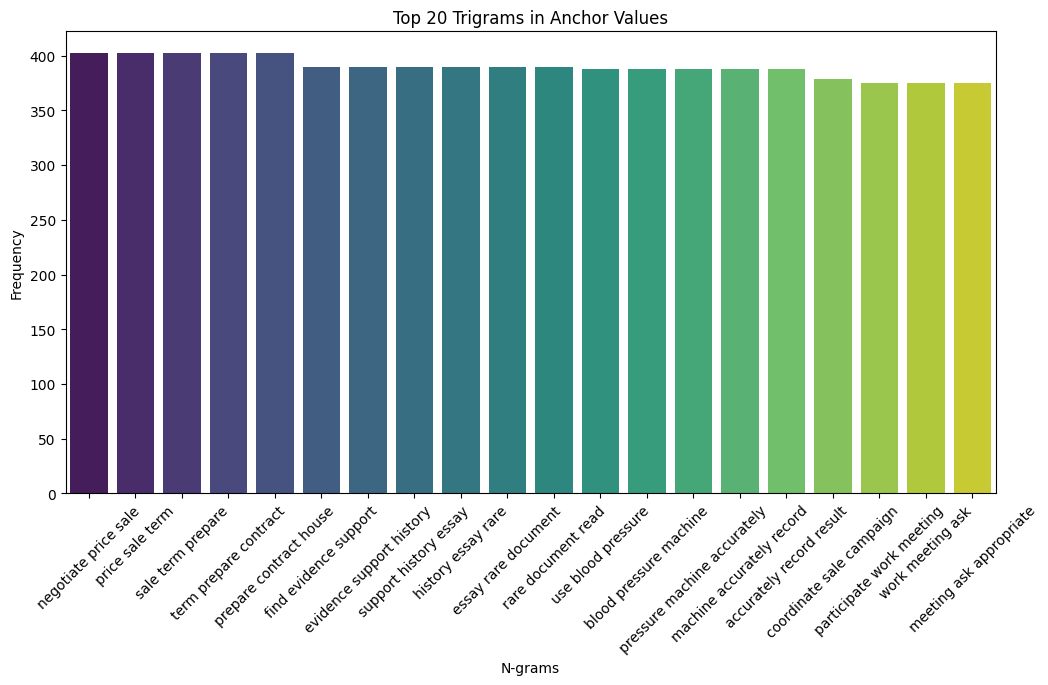

In [ ]:
from nltk.util import ngrams
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a single flattened list of words after removing stopwords
filtered_words_flat = [word for words in filtered_words for word in words]

# Generate bigrams and trigrams
bigrams = list(ngrams(filtered_words_flat, 2))
trigrams = list(ngrams(filtered_words_flat, 3))

# Count frequency of bigrams and trigrams
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

# Get the top 20 most common bigrams and trigrams
top_20_bigrams = bigram_freq.most_common(20)
top_20_trigrams = trigram_freq.most_common(20)

# Display the top 20 bigrams and trigrams with counts
print("\n🔹 Top 20 Bigrams:")
for bigram, count in top_20_bigrams:
    print(f"{' '.join(bigram)}: {count}")

print("\n🔹 Top 20 Trigrams:")
for trigram, count in top_20_trigrams:
    print(f"{' '.join(trigram)}: {count}")

# Function to plot bigrams/trigrams
def plot_ngrams(ngrams_list, title):
    ngram_labels, ngram_counts = zip(*ngrams_list)
    ngram_labels = [' '.join(ngram) for ngram in ngram_labels]  # Convert tuples to strings

    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(ngram_labels), y=list(ngram_counts), palette="viridis")
    plt.xticks(rotation=45)
    plt.xlabel("N-grams")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.show()

# Plot Bigrams
plot_ngrams(top_20_bigrams, "Top 20 Bigrams in Anchor Values")

# Plot Trigrams
plot_ngrams(top_20_trigrams, "Top 20 Trigrams in Anchor Values")


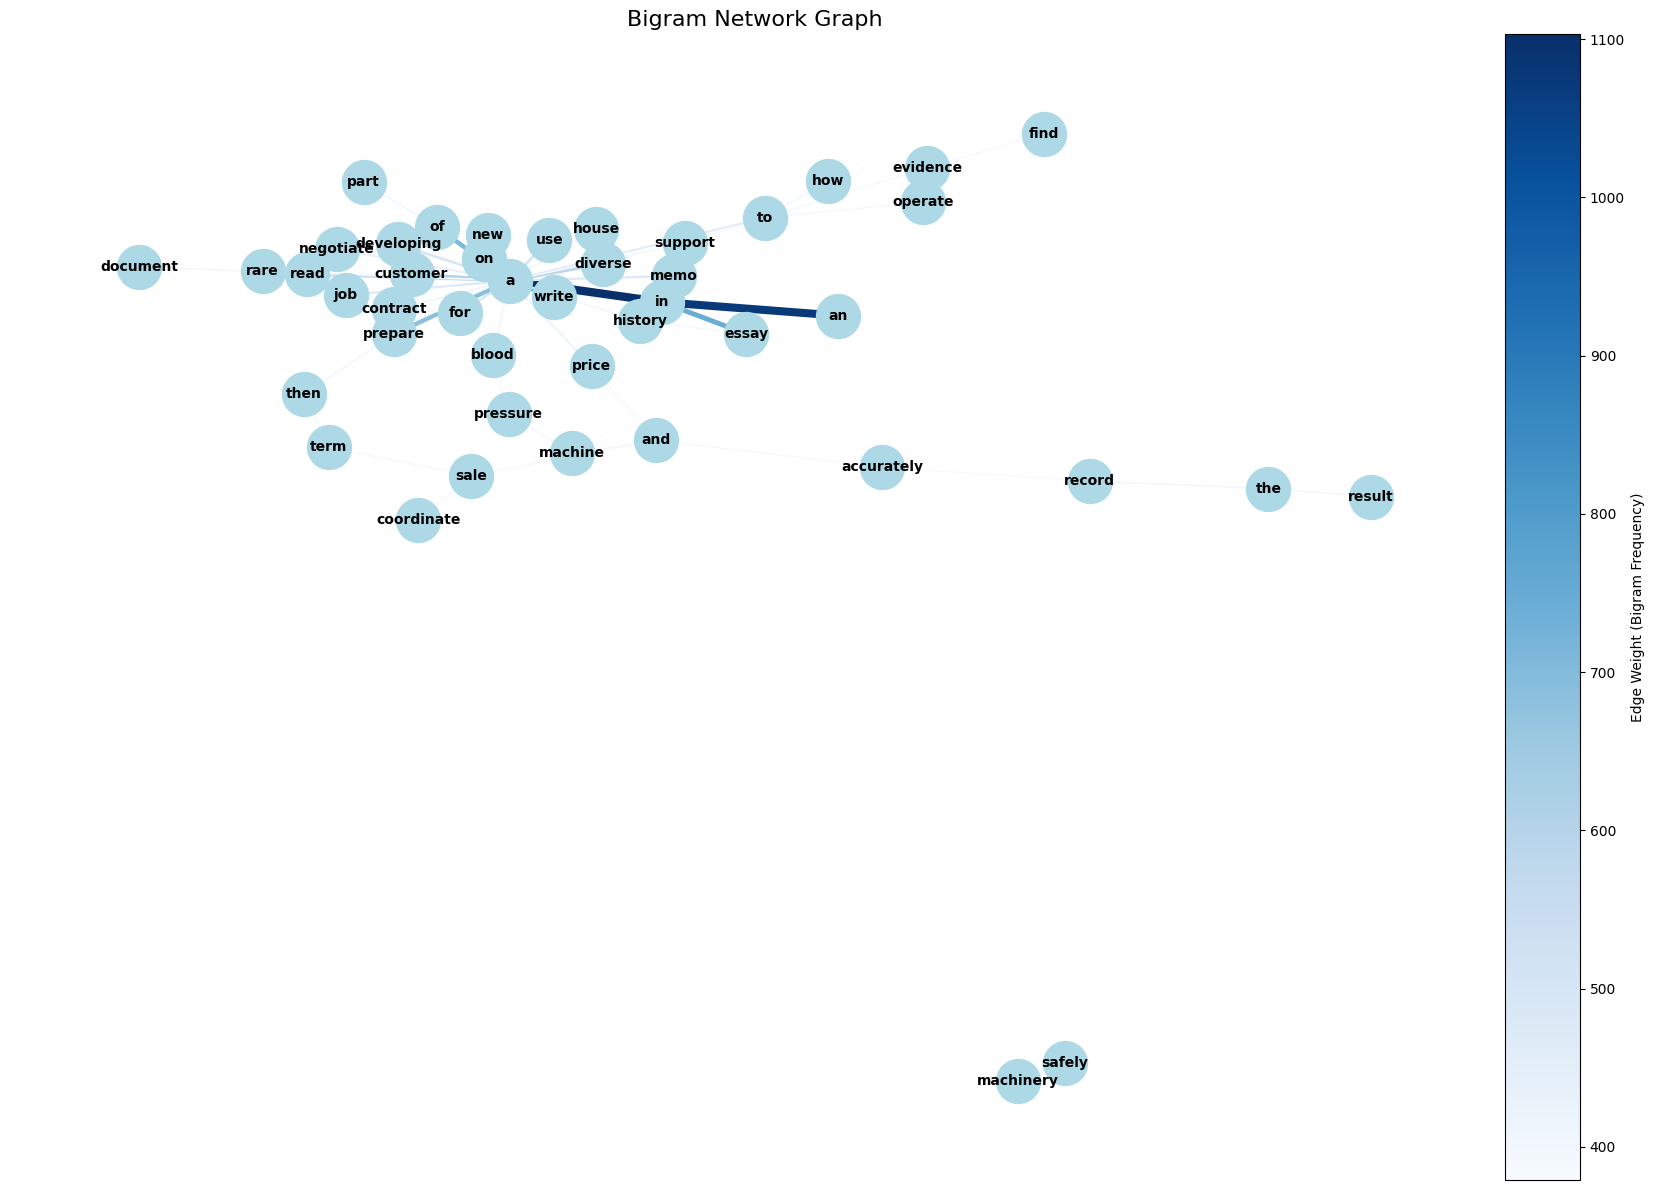

In [ ]:
import nltk
from nltk.util import bigrams
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Assuming 'lemmatized_anchor_values' is already a list of lists (tokenized words)
all_words = [word for words in lemmatized_anchor_values for word in words]  # Flatten the list

# Define the function to plot bigram network
def plot_bigram_network(words, n=50):
    if not words:
        print("No words found. Ensure that 'lemmatized_anchor_values' contains data.")
        return

    # Get bigrams from words and count frequencies
    bigram_freq = Counter(bigrams(words))

    # Create a network graph
    G = nx.Graph()
    edge_width = []
    edge_color = []

    for bigram, count in bigram_freq.most_common(n):
        G.add_edge(bigram[0], bigram[1], weight=count)
        edge_width.append(count)
        edge_color.append(count)

    # Normalize edge widths for better visualization
    if edge_width:
        edge_width = np.array(edge_width, dtype=float)
        if edge_width.max() > edge_width.min():
            edge_width = 1 + (edge_width - edge_width.min()) * 5 / (edge_width.max() - edge_width.min())
        else:
            edge_width = np.full_like(edge_width, 3)  # Default width if all values are the same

    # Plot the graph
    plt.figure(figsize=(16, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=50)  # Compute node positions using the spring layout algorithm

    # Draw nodes, edges, and labels
    nx.draw_networkx_nodes(G, pos, node_size=1000, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, width=edge_width, edge_color=edge_color, edge_cmap=plt.cm.Blues)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight="bold")

    plt.title('Bigram Network Graph', fontsize=16)
    plt.axis('off')
    plt.tight_layout()

    # Add a colorbar to show the weight scale
    if edge_color:
        divider = make_axes_locatable(plt.gca())
        cax = divider.append_axes("right", size="5%", pad=0.05)
        sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin=min(edge_color), vmax=max(edge_color)))
        cbar = plt.colorbar(sm, cax=cax)
        cbar.set_label('Edge Weight (Bigram Frequency)', fontsize=10)

    plt.show()

# Call the function with 'all_words'
plot_bigram_network(all_words)


In [ ]:
print("Lemmatized data:")
print(f"1. {' '.join(lemmatized_anchor_values[0])}")
print(f"2. {' '.join(lemmatized_anchor_values[1])}")
print(f"3. {' '.join(lemmatized_anchor_values[2])}")

Lemmatized data:
1. build and maintain an effective online profile for career management
2. negotiate a price and sale term then prepare a contract for a house
3. learn a new filing system that group document by type security classification subject and date


In [ ]:
print("Lemmatized data:")
print(f"1. {' '.join(filtered_words[0])}")
print(f"2. {' '.join(filtered_words[1])}")

Lemmatized data:
1. build maintain effective online profile career management
2. negotiate price sale term prepare contract house


In [ ]:
# This module implements the concept of a Dictionary
# i.e. a mapping between words and their integer ids
from gensim.corpora import Dictionary

# Create a dictionary
dictionary = Dictionary(filtered_words)

# Print sample mapping
keys = list(dictionary.token2id.keys())[:5]
vals = list(dictionary.token2id.values())[:5]
print("Sample dictionary mapping:")
for (key, val) in zip(keys, vals):
    print(f"{key} => {val}")

Sample dictionary mapping:
build => 0
career => 1
effective => 2
maintain => 3
management => 4


In [ ]:
# Build a corpus for the topic model

# Convert the document into a Bag-Of-Words format by producing
# a list of tuples in (token_id, token_count) format
corpus = [dictionary.doc2bow(text) for text in filtered_words]

# Print a sample from the created corpus
print(f"Text: {' '.join(filtered_words[0])}")
print(f"Corpus: {corpus[0]}")

Text: build maintain effective online profile career management
Corpus: [(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]


In [ ]:
# Module to train and use the Latent Dirichlet Allocation model
from gensim.models.ldamodel import LdaModel

# Initialize the model with the corpus and dictionary - this will take a while to run, be patient!
lda_model = LdaModel(
   corpus=corpus, id2word=dictionary, num_topics=10,
   random_state=100, update_every=1, chunksize=100,
   passes=10, alpha='auto', per_word_topics=True
)

#You may fine tune parameters from the documentation here: https://radimrehurek.com/gensim/models/ldamodel.html. Try them out.

In [ ]:
# Save the model

lda_model.save("lda_model") # Save the model as lda_model
del lda_model # Delete the model and free up the space used by it

In [ ]:
# Load the model
lda_model = LdaModel.load("lda_model") # Load it by passing the name

In [ ]:
#!pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 48.7 MB/s eta 0:00:00


In [ ]:
import pyLDAvis # Module for interactive topic model visualization
# Function to prepare LDA model for visualiztion
from pyLDAvis.gensim import prepare

# Enable the display of visualizations in IPython Notebooks
pyLDAvis.enable_notebook()

# Prepare and transform and LDA model
pyLDAvis_data = prepare(lda_model, corpus, dictionary)

In [ ]:
pyLDAvis.display(pyLDAvis_data)

In [ ]:
# Get the dominant topic for each document (row in the dataset)
dominant_topics = [max(lda_model.get_document_topics(dictionary.doc2bow(tokens)), key=lambda x: x[1])[0] for tokens in lemmatized_anchor_values]

# Add the dominant topic as a new column in the dataset
cc_merged_nlp['Dominant Topic'] = dominant_topics

# Now, compare the dominant topic with the actual Core Competency label
print(cc_merged_nlp[['Core Competency', 'Dominant Topic']].head(30))


              Core Competency  Dominant Topic
0          Digital engagement               5
1   Initiative and innovation               4
2                    Learning               5
3                    Numeracy               1
4          Oral communication               5
5     Planning and organising               7
6             Problem solving               2
7                     Reading               9
8                    Teamwork               8
9                     Writing               4
10         Digital engagement               6
11  Initiative and innovation               4
12                   Learning               0
13                   Numeracy               1
14         Oral communication               5
15    Planning and organising               9
16            Problem solving               0
17                    Reading               8
18                   Teamwork               8
19                    Writing               4
20         Digital engagement     

In [ ]:
# Get the dominant topic for each document (row in the dataset)
dominant_topics = [max(lda_model.get_document_topics(dictionary.doc2bow(tokens)), key=lambda x: x[1])[0] for tokens in lemmatized_anchor_values]

# Add the dominant topic as a new column in the dataset
cc_merged_nlp['Dominant Topic'] = dominant_topics

# Filter the rows where the ANZSCO Title is 'Data Analyst' or 'Data Scientist'
filtered_data = cc_merged_nlp[cc_merged_nlp['ANZSCO Title'].isin(['Data Analyst', 'Data Scientist'])]

# Display the relevant columns for these specific rows
print(filtered_data[['ANZSCO Title', 'Core Competency', 'Dominant Topic', 'Proficiency Level', 'Score']].head(30))


        ANZSCO Title            Core Competency  Dominant Topic  \
2410    Data Analyst         Digital engagement               6   
2411    Data Analyst  Initiative and innovation               1   
2412    Data Analyst                   Learning               0   
2413    Data Analyst                   Numeracy               4   
2414    Data Analyst         Oral communication               5   
2415    Data Analyst    Planning and organising               8   
2416    Data Analyst            Problem solving               0   
2417    Data Analyst                    Reading               8   
2418    Data Analyst                   Teamwork               7   
2419    Data Analyst                    Writing               4   
2430  Data Scientist         Digital engagement               6   
2431  Data Scientist  Initiative and innovation               1   
2432  Data Scientist                   Learning               0   
2433  Data Scientist                   Numeracy               

### Tech Tools

"""Technology Tool Category → Category of technology tools
Technology Tool Category Description → Describes tool category
Technology Tool → Actual tool name
Technology Tool Description → Short description
Technology Tool Extended Description → More details on tool
ANZSCO Title_x → Occupation title
ANZSCO Description → Description of the occupation"""

In [ ]:
tt_merged_df.info()

#### TT Desc

In [ ]:
!python3 -m spacy download en_core_web_sm
!pip install pyldavis

In [ ]:
"""
cc_merged_df.to_excel("cc_merged_df.xlsx", index=False, header=False)
"""

In [ ]:
tt_data = tt_merged_df.copy()

In [ ]:
tt_data['Technology Tool Extended Description'][0]

In [ ]:
ext_desc_text = tt_data['Technology Tool Extended Description'].to_string()

#create word tokens
tokenized_words=word_tokenize(ext_desc_text)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(ext_desc_text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:


# Example text from 'Technology Tool Extended Description'
ext_desc_text = tt_data['Technology Tool Extended Description'].to_string()

# Tokenize the text
tokens = word_tokenize(ext_desc_text)  # Convert to lowercase


# Count word frequencies
word_counts = Counter(tokens)

# Get the most common words (top 20)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words Frequency')
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Example text from 'Technology Tool Extended Description'
ext_desc_text = tt_data['Technology Tool Extended Description'].to_string()

# Tokenize the text
tokens = word_tokenize(ext_desc_text.lower())  # Convert to lowercase

# Remove stopwords
stop_words = set(stopwords.words("english"))
filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_tokens)

# Get the most common words (top 20)
top_words = word_counts.most_common(20)
words, counts = zip(*top_words)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words Frequency')
plt.tight_layout()
plt.show()


In [ ]:
filtered_tokens_length = len(filtered_tokens)
print(f"Number of filtered tokens: {filtered_tokens_length}")


In [ ]:
ccc

In [ ]:
from nltk import ngrams
from collections import Counter
import re

def get_top_ngrams(text, n, top_k):

    # Generate n-grams
    n_grams = list(ngrams(text, n))

    # Count the frequency of each n-gram
    n_gram_freq = Counter(n_grams)

    # Get the top k most frequent n-grams
    top_n_grams = n_gram_freq.most_common(top_k)

    return top_n_grams


# Get top 10 bigrams
top_bigrams = get_top_ngrams(tokenized_words, 2, 10)

# Get top 10 trigrams
top_trigrams = get_top_ngrams(tokenized_words, 3, 10)

# Print results
print("Top 10 Bigrams:")
for bigram, count in top_bigrams:
    print(f"{bigram}: {count}")

print("\nTop 10 Trigrams:")
for trigram, count in top_trigrams:
    print(f"{trigram}: {count}")

In [ ]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords
nltk.download('stopwords')

def preprocess_text_column(column):
    stop_words = set(stopwords.words("english"))
    return column.dropna().str.strip().str.lower().apply(
        lambda text: " ".join([word for word in text.split() if word not in stop_words])
    )


In [ ]:
tt_data['Technology Tool Extended Description'] = preprocess_text_column(tt_data['Technology Tool Extended Description'])


In [ ]:
# converting series to string
ext_desc = tt_data['Technology Tool Extended Description'].to_string()

#create word tokens
tokenized_words=word_tokenize(ext_desc)

from wordcloud import WordCloud
wordcloud = WordCloud(max_words=100).generate(ext_desc)

import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()